In [402]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U scipy
!{sys.executable} -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 29.1 MB/s eta 0:00:0000:0100:01


In [362]:
# Hash utilities
import zlib
from collections import Counter as count  
from string import printable  

# Create Hash Function
def crc32_hash_function(user_id: str) -> str:
    """Take string, even if its integer convert first to string"""
    return zlib.crc32(user_id.encode("utf-8"))

# Convert from str to hexadecimal
def to_hex(crc32encoded: str) -> hex:
    return hex(crc32encoded & 0xffffffff)

# Perform hash function to each item
def distribute(items, num_containers, hash_function = hash):  
    return count([hash_function(item) % num_containers for item in items])  

# Cli plotting
def plot(histogram):  
    for key in sorted(histogram):  
        count1 = histogram[key]  
        padding = (max(histogram.values()) - count1) * " "  
        print(f"{key:3} {'■' * count1}{padding} ({count1})")  

def plot_first_last(histogram):  
    length = len(histogram)
    for idx, key in enumerate(sorted(histogram)):  
        if idx == 0 or idx == 1 or idx == length-2 or idx == length-1:
            count1 = histogram[key]  
            padding = (max(histogram.values()) - count1) * " "  
            print(f"{key:3} {'■' * count1}{padding} ({count1})")  

bins = 5
print(f"{sys.hash_info.algorithm} hash function. {bins} containers.")
plot(distribute(printable, num_containers=bins))  

print(f"CRC32 hash function. {bins} containers.")
plot(distribute(printable, num_containers=bins, hash_function=crc32_hash_function))  

siphash24 hash function. 5 containers.
  0 ■■■■■■■■■■■■■■■■■         (17)
  1 ■■■■■■■■■■■■■■■■■■■■■     (21)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■ (25)
  3 ■■■■■■■■■■■■■■■■■■■■■     (21)
  4 ■■■■■■■■■■■■■■■■          (16)
CRC32 hash function. 5 containers.
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)


In [363]:
# low number test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(10)],   
[str(uuid.uuid4().int) for i in range(100)], 
[str(uuid.uuid4().int) for i in range(1000)] 
]

# Arbitrary bin sizes
num_bins = [5, 10, 20]

# Plot Normal hash function
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}")
        plot(distribute(val, num_containers=bin_size))  


Python hash function results for random UUIDs
Case #0  Number of Bins: 5  Number of Elements: 10
  0 ■■■ (3)
  1 ■■■ (3)
  3 ■   (1)
  4 ■■■ (3)
Case #0  Number of Bins: 10  Number of Elements: 10
  1 ■   (1)
  3 ■   (1)
  4 ■   (1)
  5 ■■■ (3)
  6 ■■  (2)
  9 ■■  (2)
Case #0  Number of Bins: 20  Number of Elements: 10
  3 ■   (1)
  4 ■   (1)
  6 ■   (1)
  9 ■   (1)
 11 ■   (1)
 15 ■■■ (3)
 16 ■   (1)
 19 ■   (1)
Case #1  Number of Bins: 5  Number of Elements: 100
  0 ■■■■■■■■■■■■■■■■■■■      (19)
  1 ■■■■■■■■■■■■■■           (14)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■ (24)
  3 ■■■■■■■■■■■■■■■■■■■■■■   (22)
  4 ■■■■■■■■■■■■■■■■■■■■■    (21)
Case #1  Number of Bins: 10  Number of Elements: 100
  0 ■■■■■■■■■■■    (11)
  1 ■■■■■■■■       (8)
  2 ■■■■■■■■■■■■■■ (14)
  3 ■■■■■■■■■■■    (11)
  4 ■■■■■■■■■■     (10)
  5 ■■■■■■■■       (8)
  6 ■■■■■■         (6)
  7 ■■■■■■■■■■     (10)
  8 ■■■■■■■■■■■    (11)
  9 ■■■■■■■■■■■    (11)
Case #1  Number of Bins: 20  Number of Elements: 100
  0 ■■■■■    (5)
 

Python hash function results for random UUIDs
Test case #1 - Num of Bins: 5  Num of UUIDs: 10


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


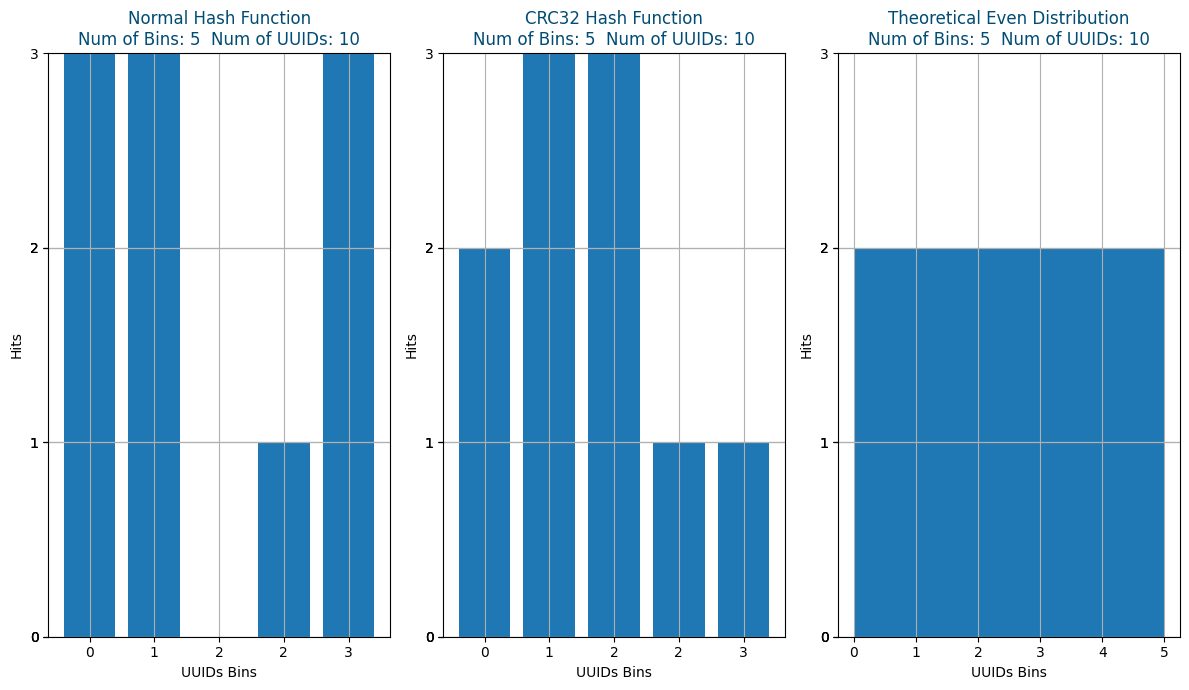

Test case #2 - Num of Bins: 10  Num of UUIDs: 10


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


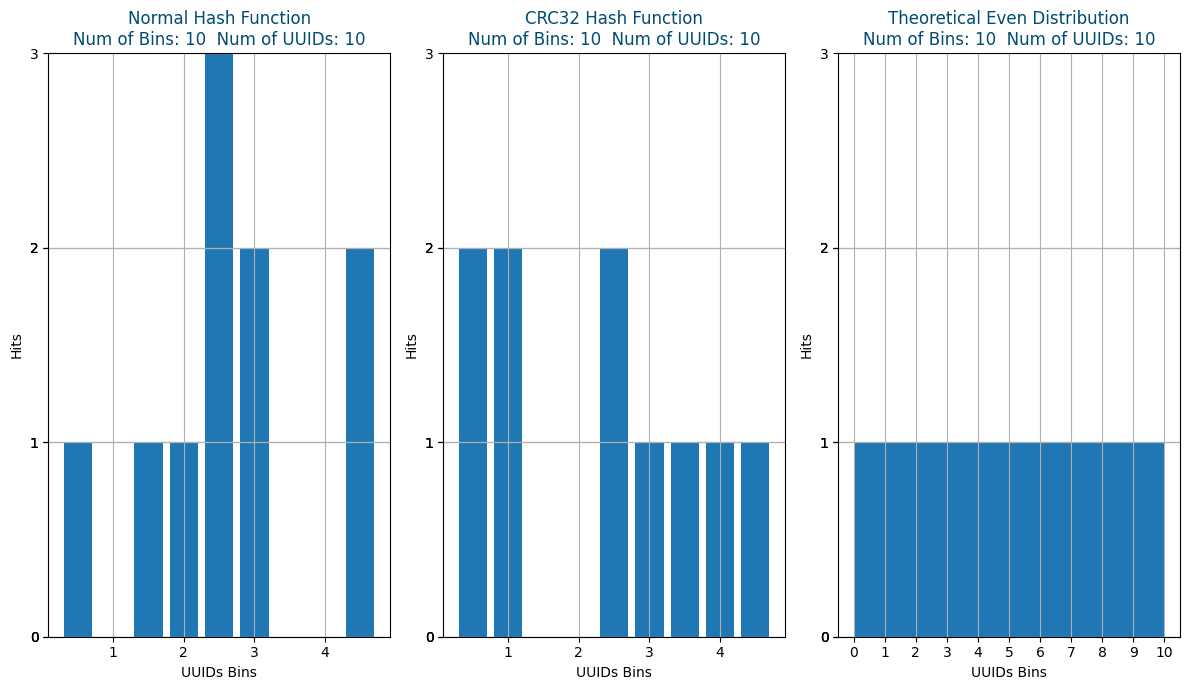

Test case #3 - Num of Bins: 20  Num of UUIDs: 10


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


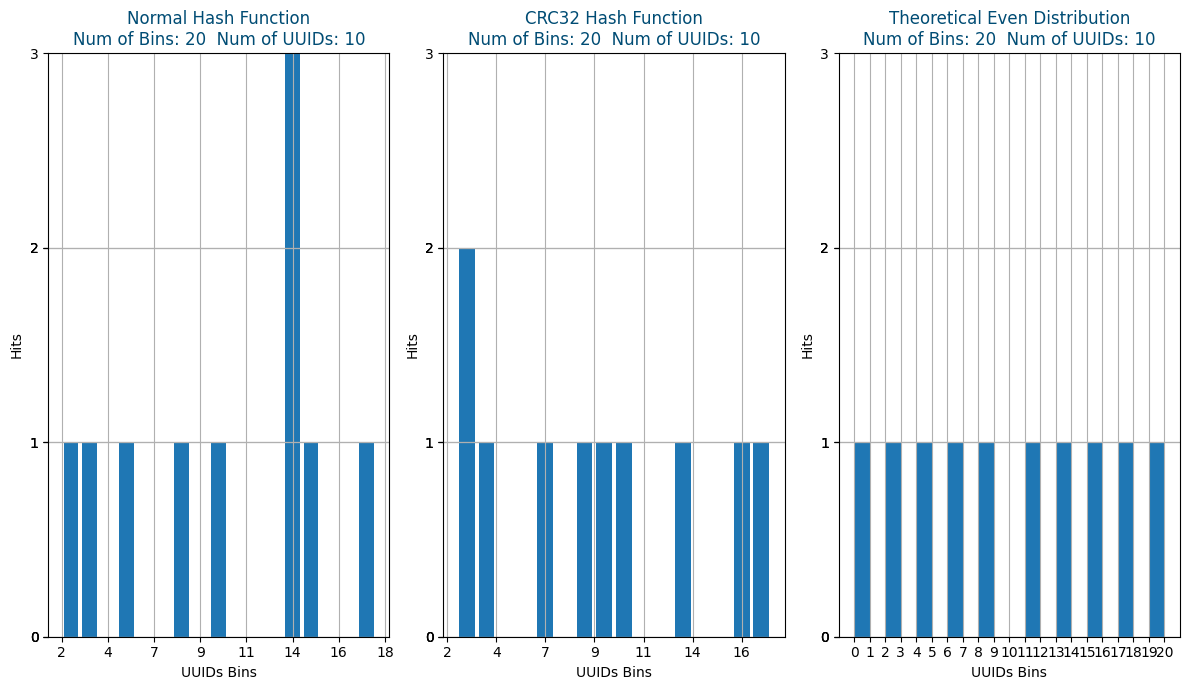

/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


Test case #4 - Num of Bins: 5  Num of UUIDs: 100


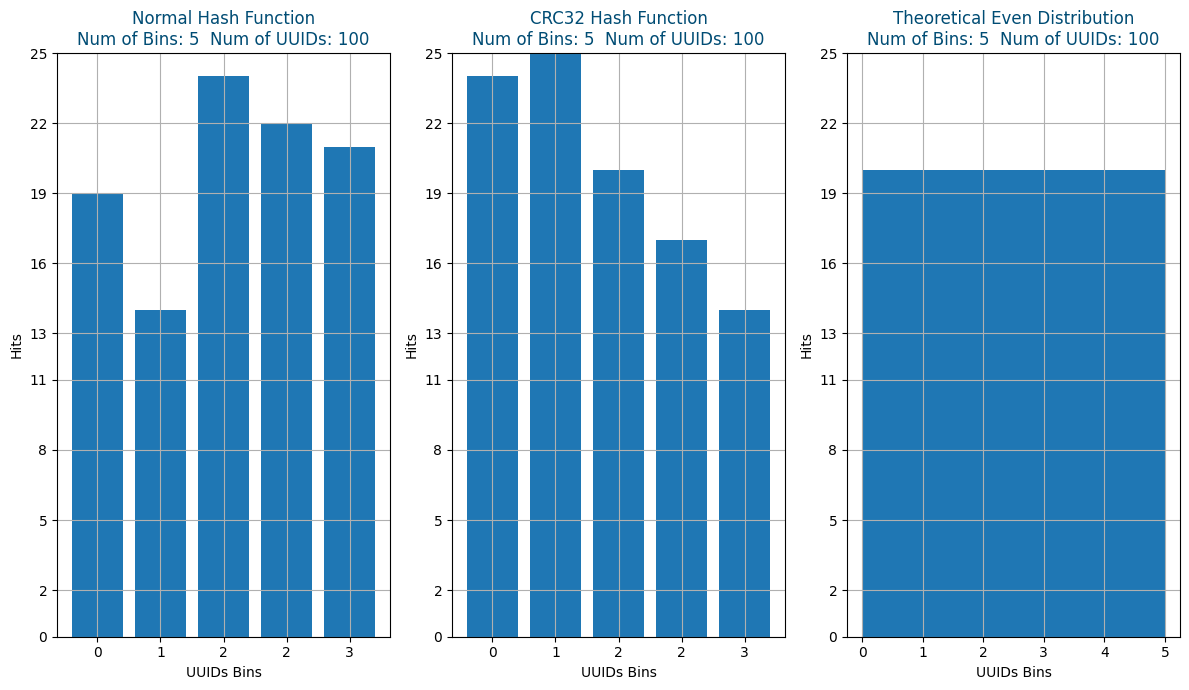

/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


Test case #5 - Num of Bins: 10  Num of UUIDs: 100


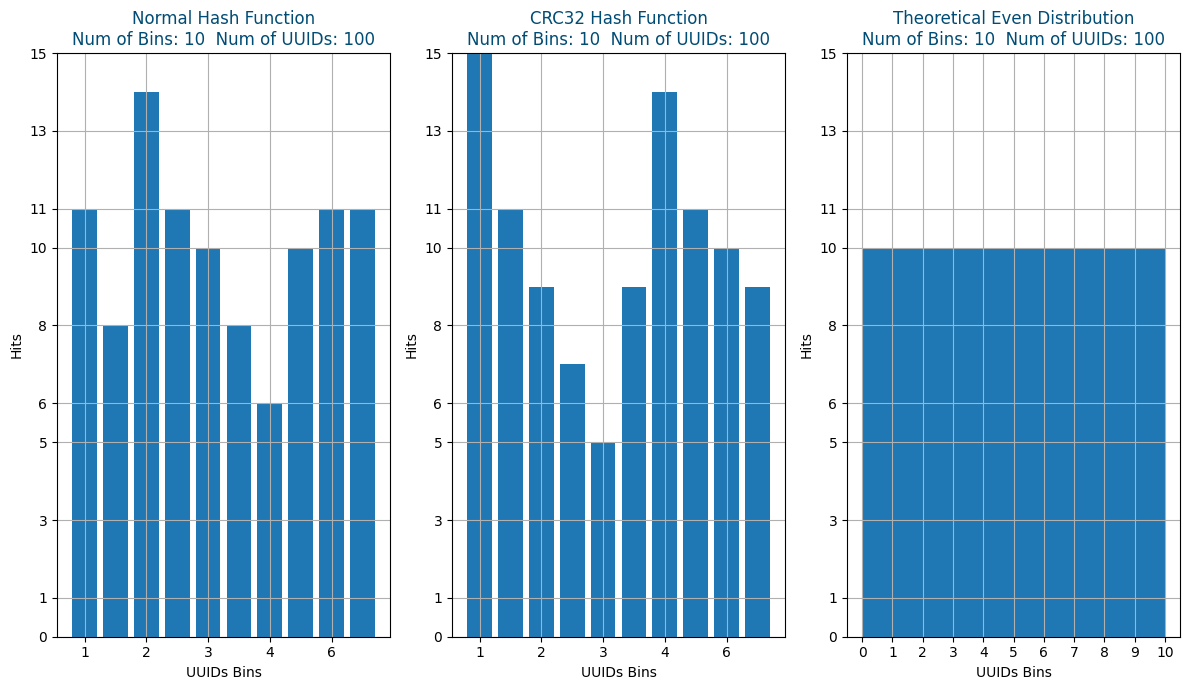

Test case #6 - Num of Bins: 20  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


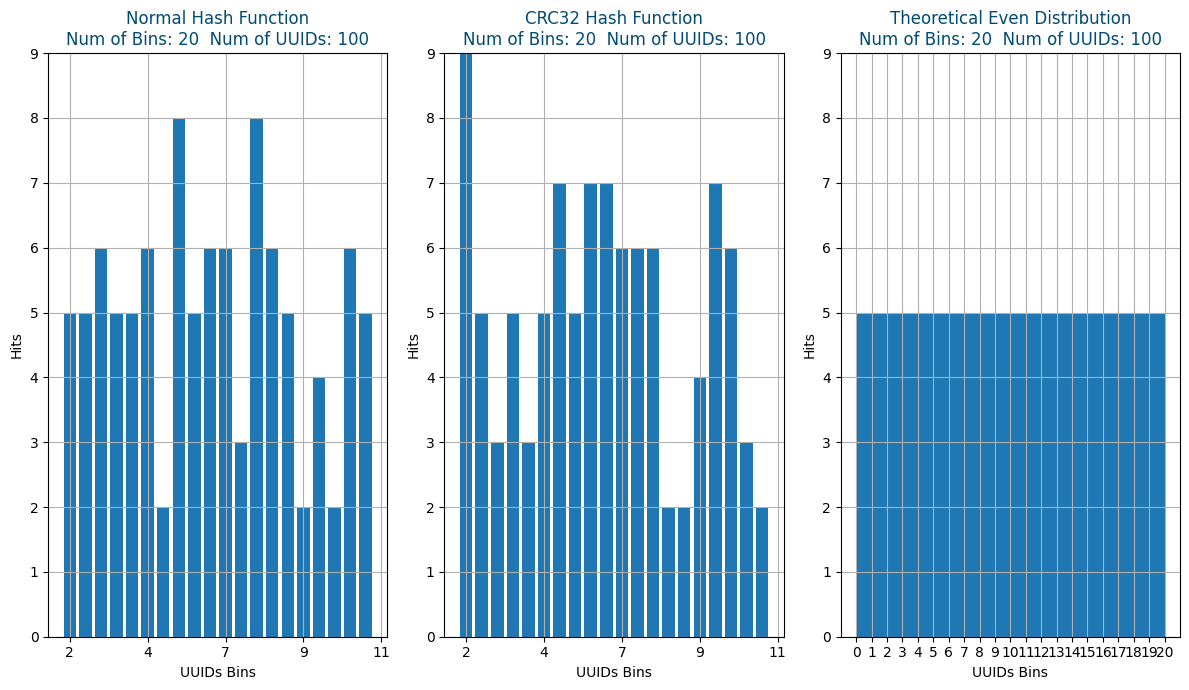

Test case #7 - Num of Bins: 5  Num of UUIDs: 1000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


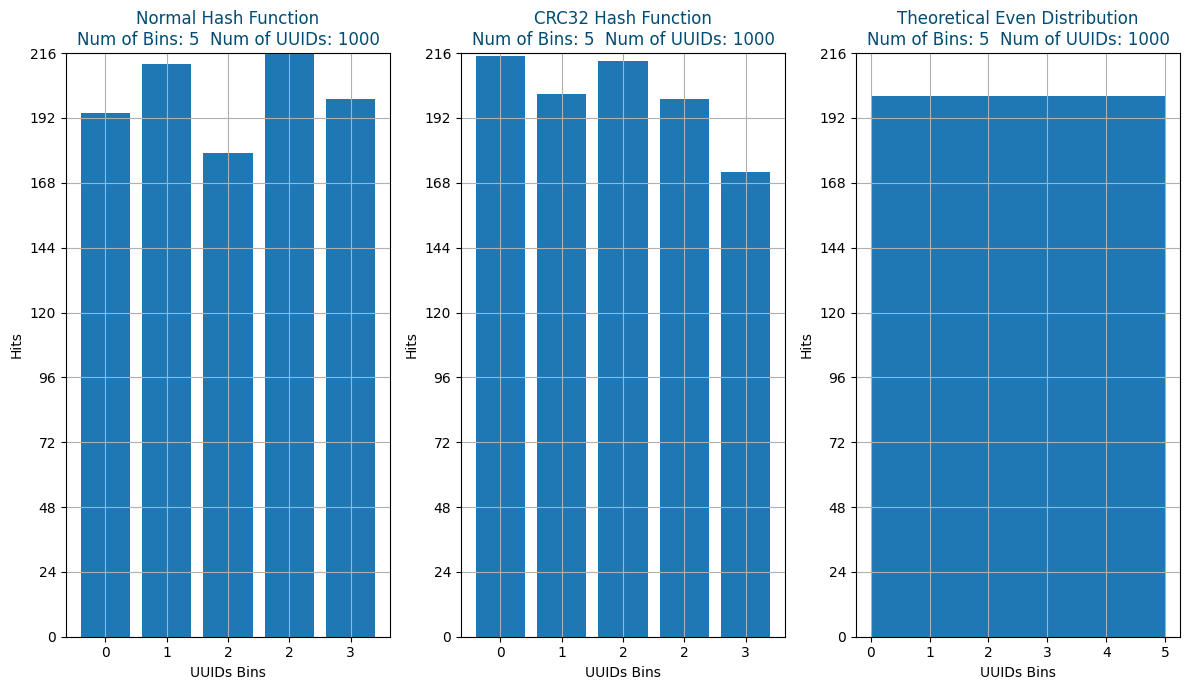

Test case #8 - Num of Bins: 10  Num of UUIDs: 1000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


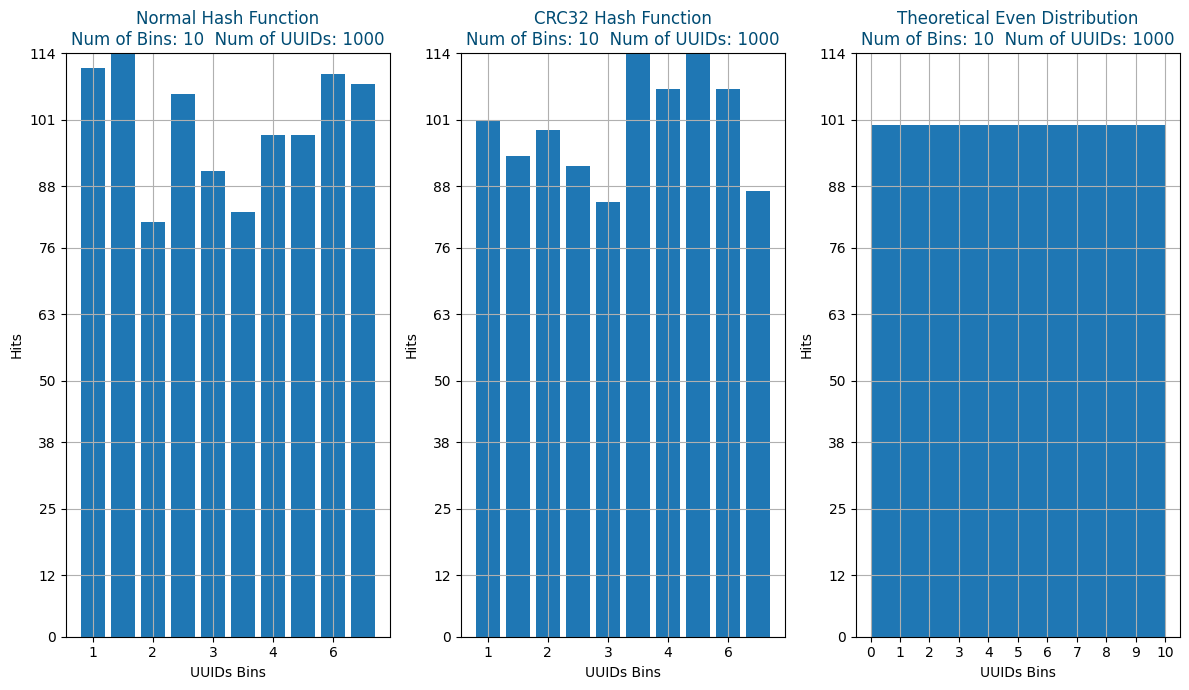

Test case #9 - Num of Bins: 20  Num of UUIDs: 1000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/1960016623.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


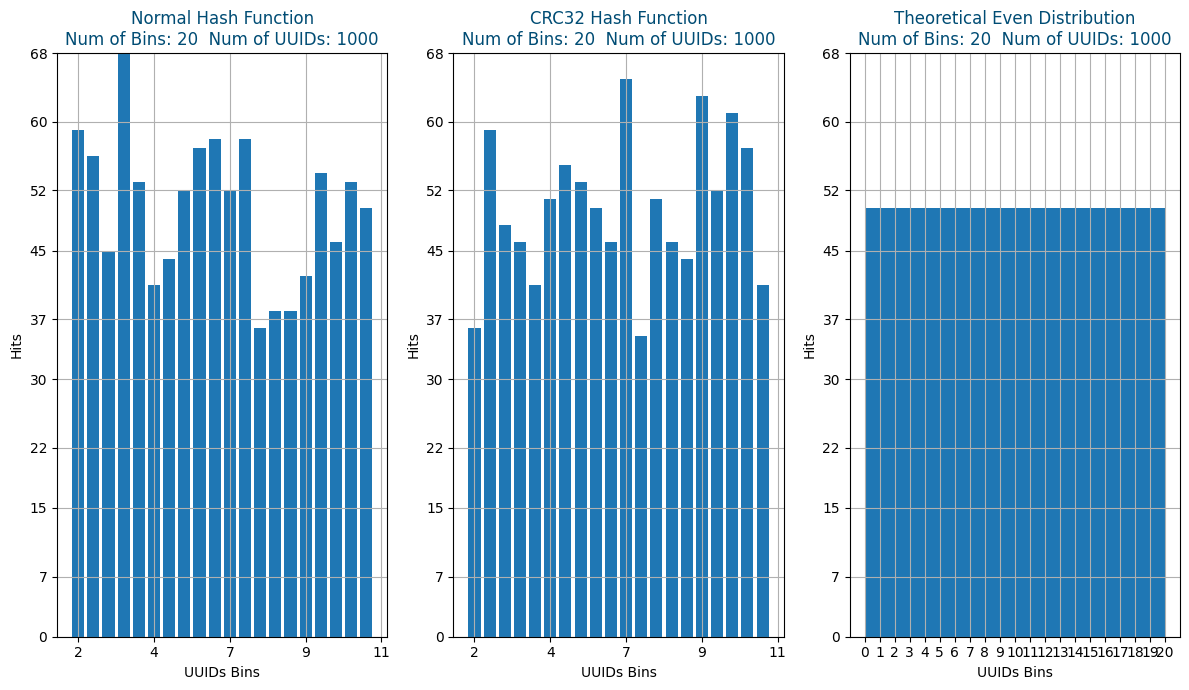

In [432]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
color_bars2 = '#5596E1'
txt_color1 = '#252525'
txt_color2 = '#004C74'

print("Python hash function results for random UUIDs")
counter = 0
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        counter+=1
        title = f"Num of Bins: {bin_size}  Num of UUIDs: {len(val)}"
        print(f"Test case #{counter} - {title}")

        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))
        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), tight_layout=True)

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values())

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values())

        # Histogram even distribution
        uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_val = [(i.hex) for i in uuids]  # Convert to hexadecimal
        density, bins, _ = axs[2].hist(hex_val, bins=bin_size)

        # Get max values from Collections
        def f_max(s): return max((c := (s)), key=c.get)
        normal_hash_max = normal_hash_counts[f_max(normal_hash_counts)]
        crc32_hash_max = crc32_hash_counts[f_max(crc32_hash_counts)]
        c_max = max(density)  # Normal max for array
        
        # Get global_max
        global_max = max([normal_hash_max, crc32_hash_max, c_max])

        # Change ax for all
        for ax in axs:
            #ax.grid(axis='y', color=facecolor, lw = 0.9, alpha=0.7)
            #ax.grid(axis='x', color=facecolor, lw = 0.9)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, global_max])
            ax.set_yticks(np.linspace(0, global_max, num=10, dtype=int))
            ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))

        # Change ax for chart 1
        ax = axs[0]
        ax.set_title(f"Normal Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")

        # Change ax for chart 2
        ax = axs[1]
        ax.set_title(f"CRC32 Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")

        # Change ax for chart 3
        ax = axs[2]
        ax.set_title(f"Theoretical Even Distribution\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        #ax.tick_params(axis='x', which='both', rotation=55)
        ax.set_xticks(bins)
        ax.set_xticklabels(np.arange(len(bins)))
        plt.show()

Python hash function results for random UUIDs
Test case #1 - Num of Bins: 5  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


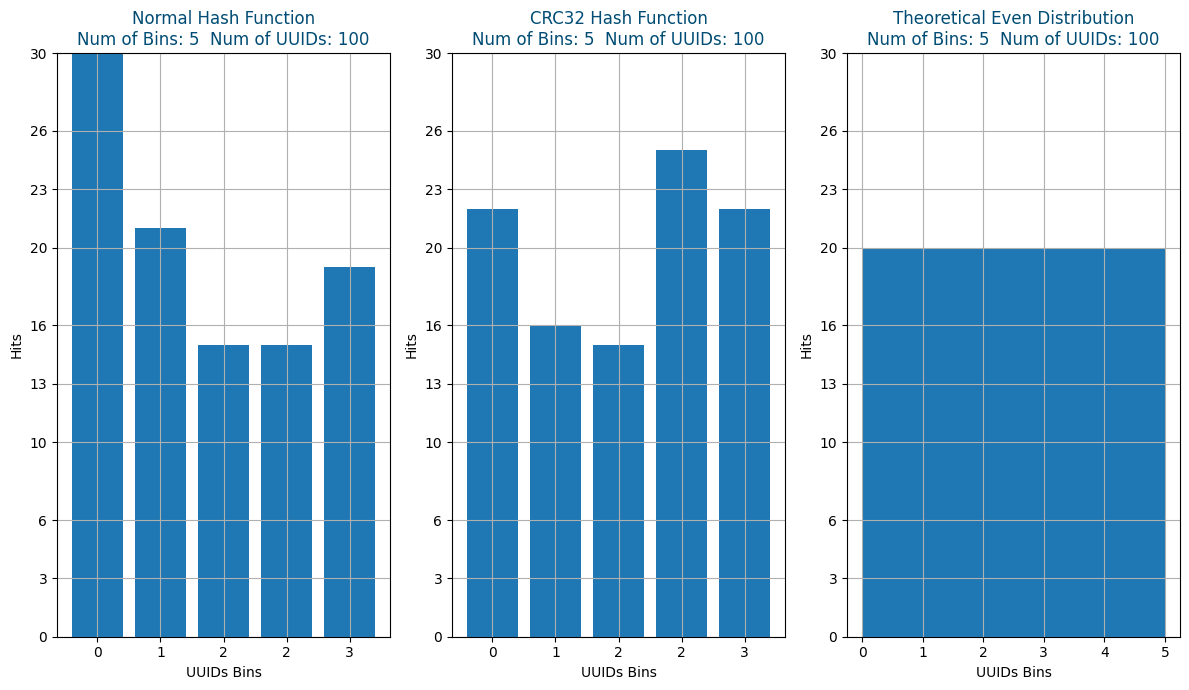

Test case #2 - Num of Bins: 10  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


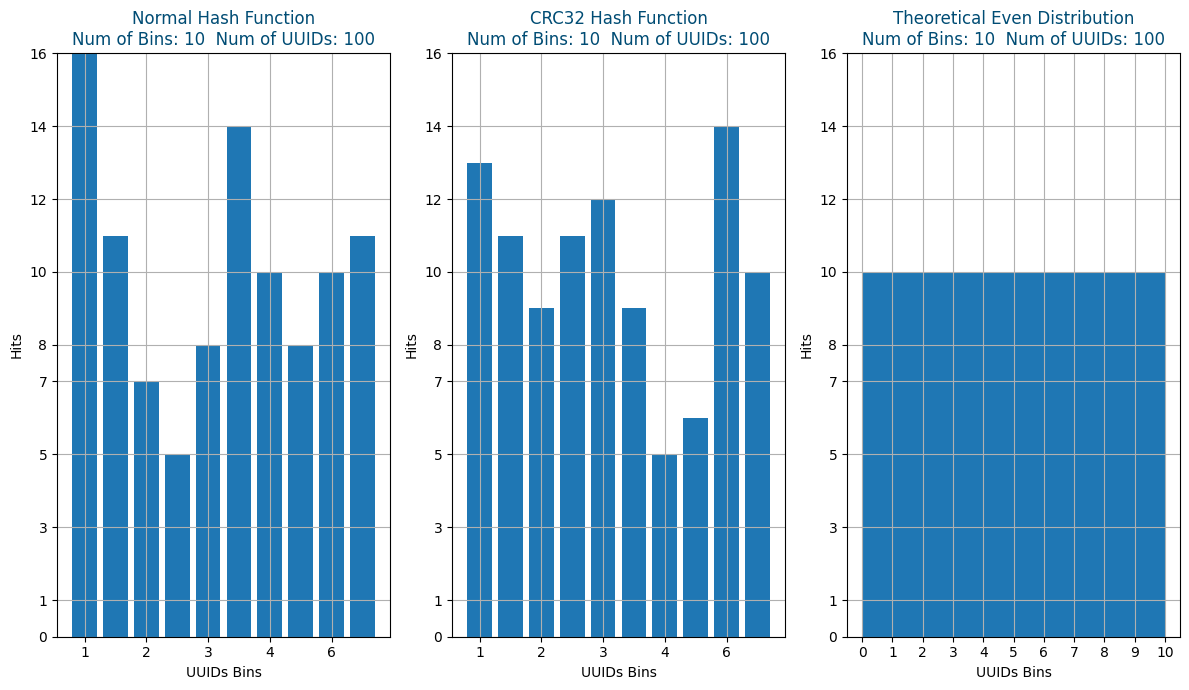

Test case #3 - Num of Bins: 50  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


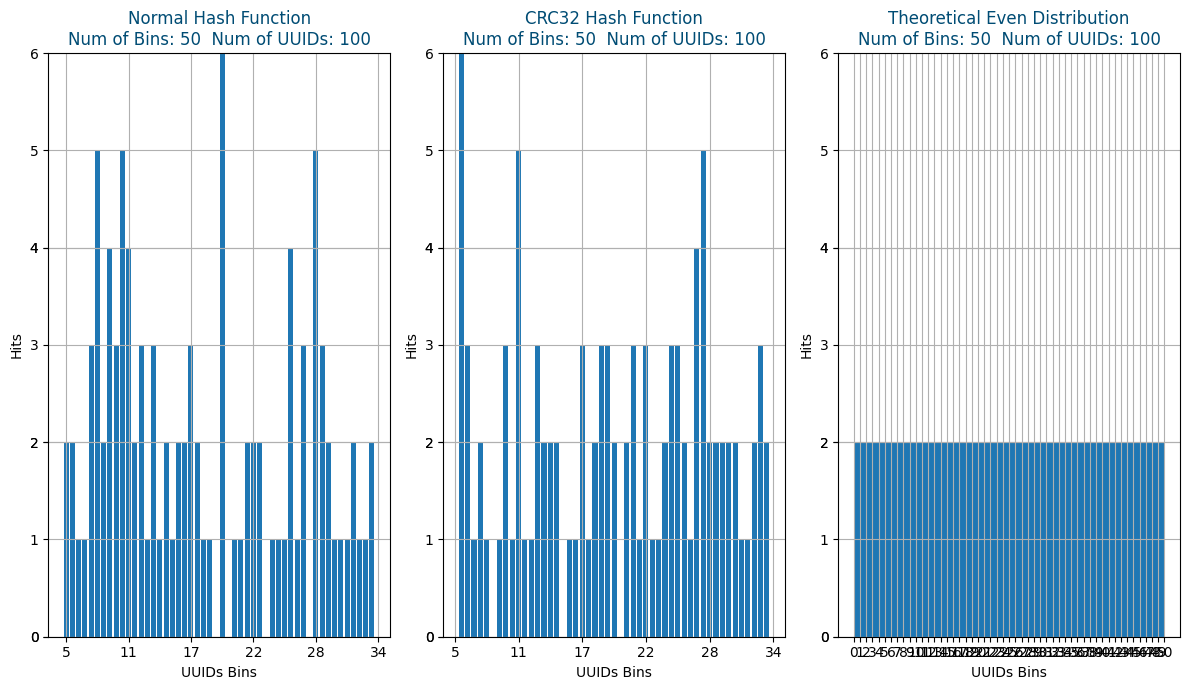

Test case #4 - Num of Bins: 100  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


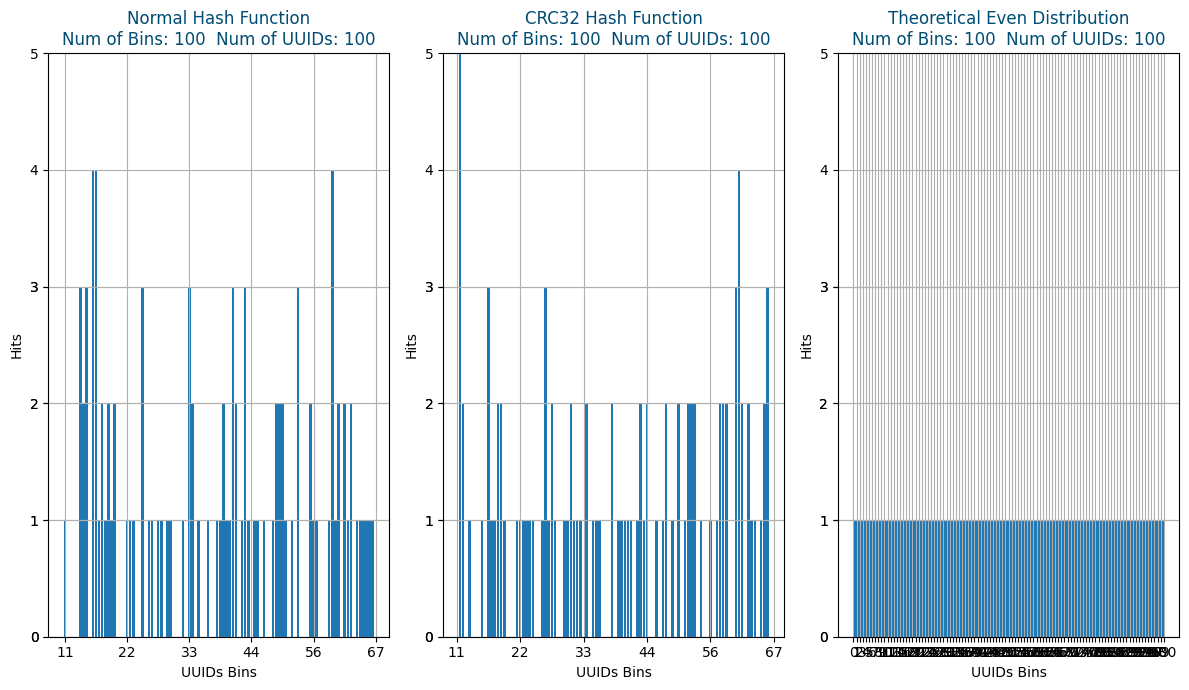

Test case #5 - Num of Bins: 850  Num of UUIDs: 100


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


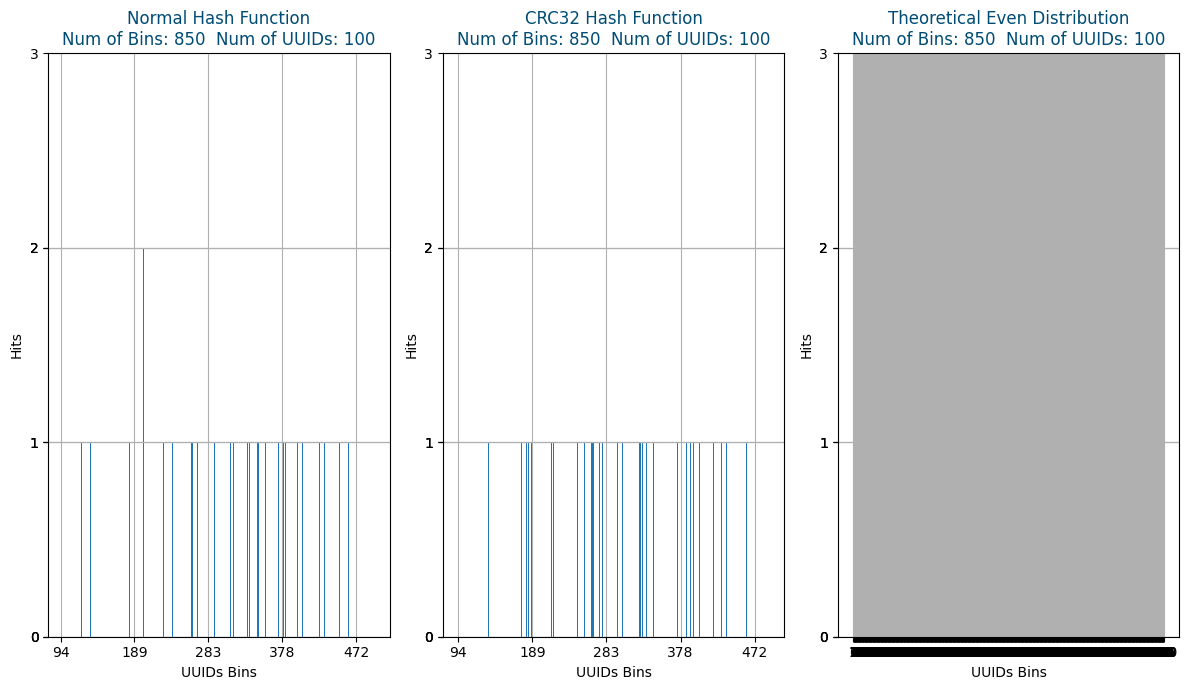

Test case #6 - Num of Bins: 5  Num of UUIDs: 10000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


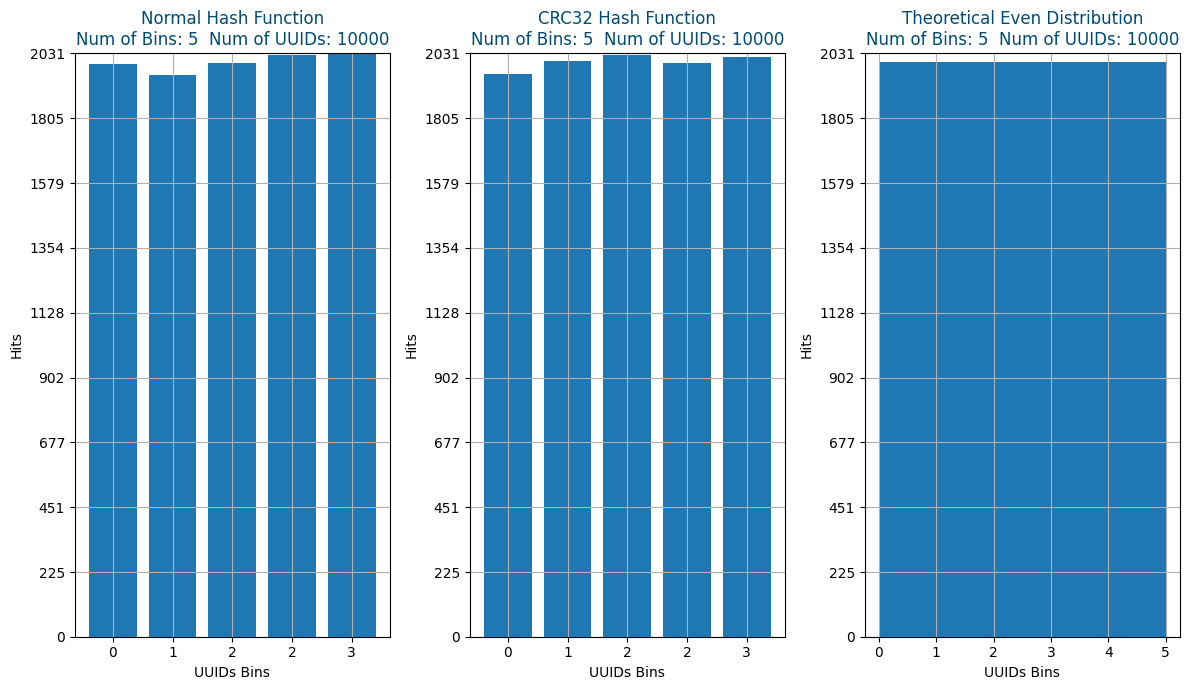

Test case #7 - Num of Bins: 10  Num of UUIDs: 10000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


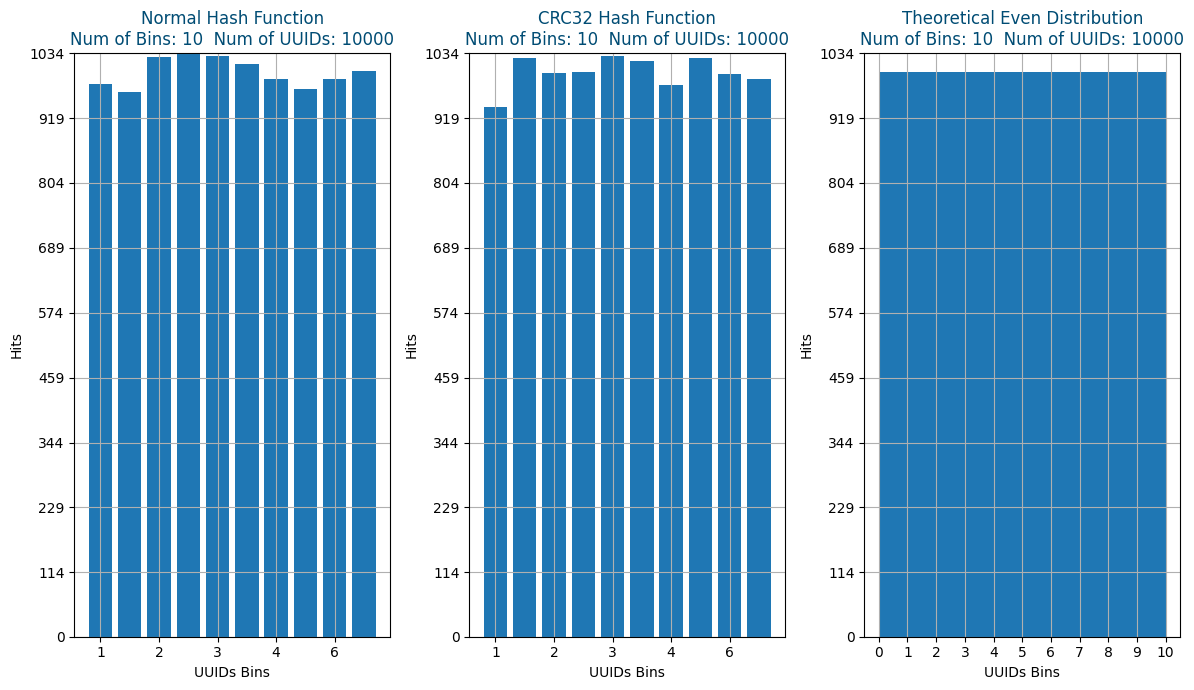

Test case #8 - Num of Bins: 50  Num of UUIDs: 10000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


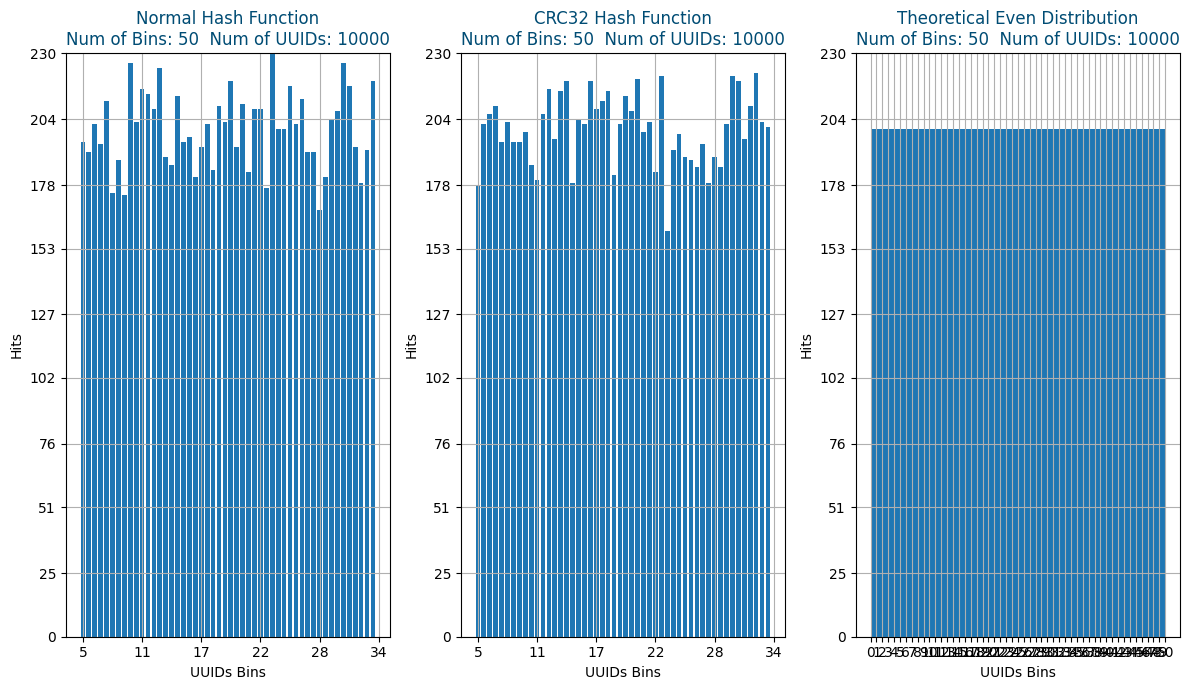

Test case #9 - Num of Bins: 100  Num of UUIDs: 10000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


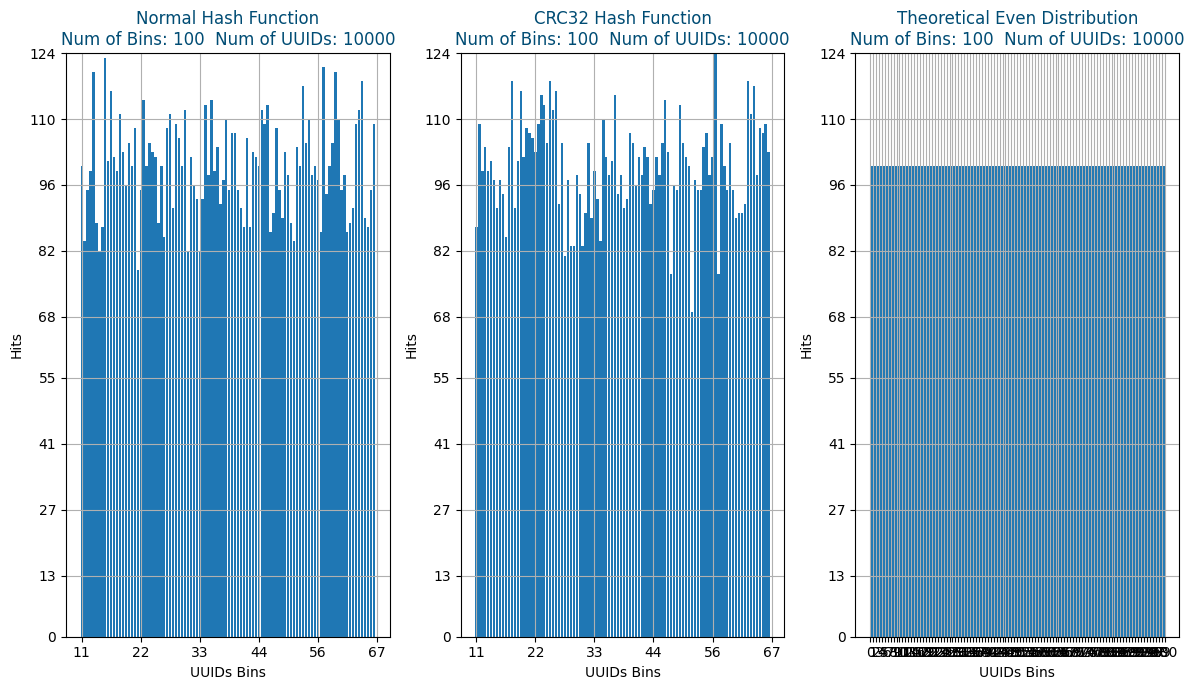

Test case #10 - Num of Bins: 850  Num of UUIDs: 10000


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


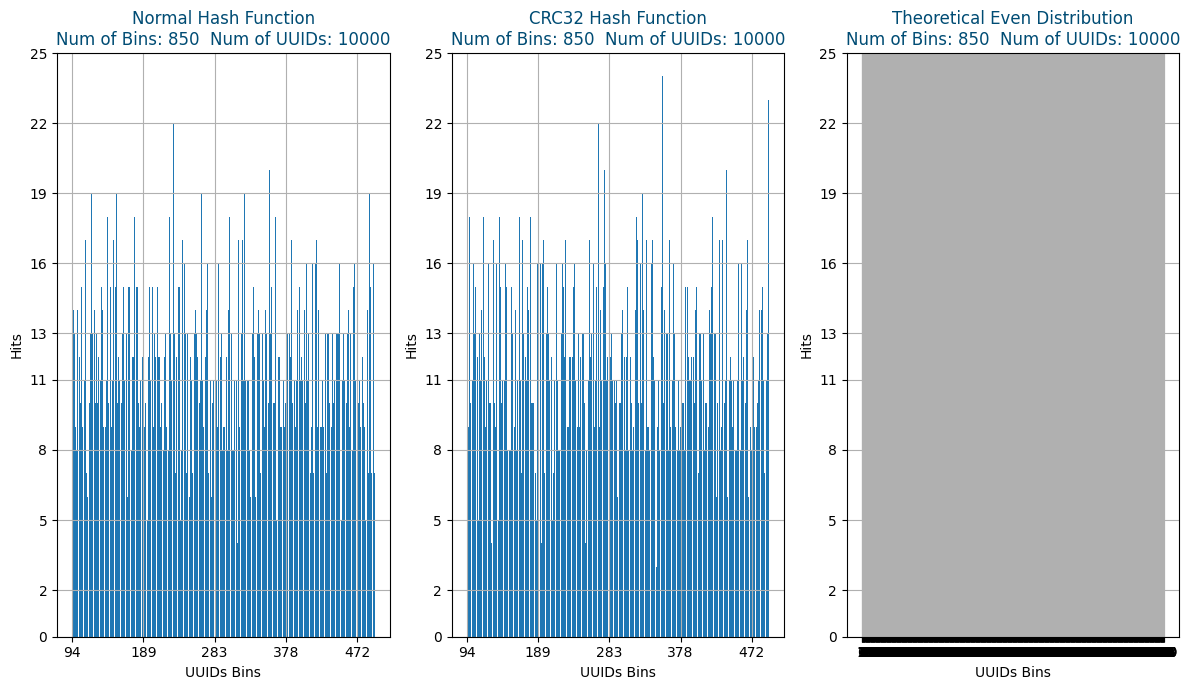

Test case #11 - Num of Bins: 5  Num of UUIDs: 23639


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


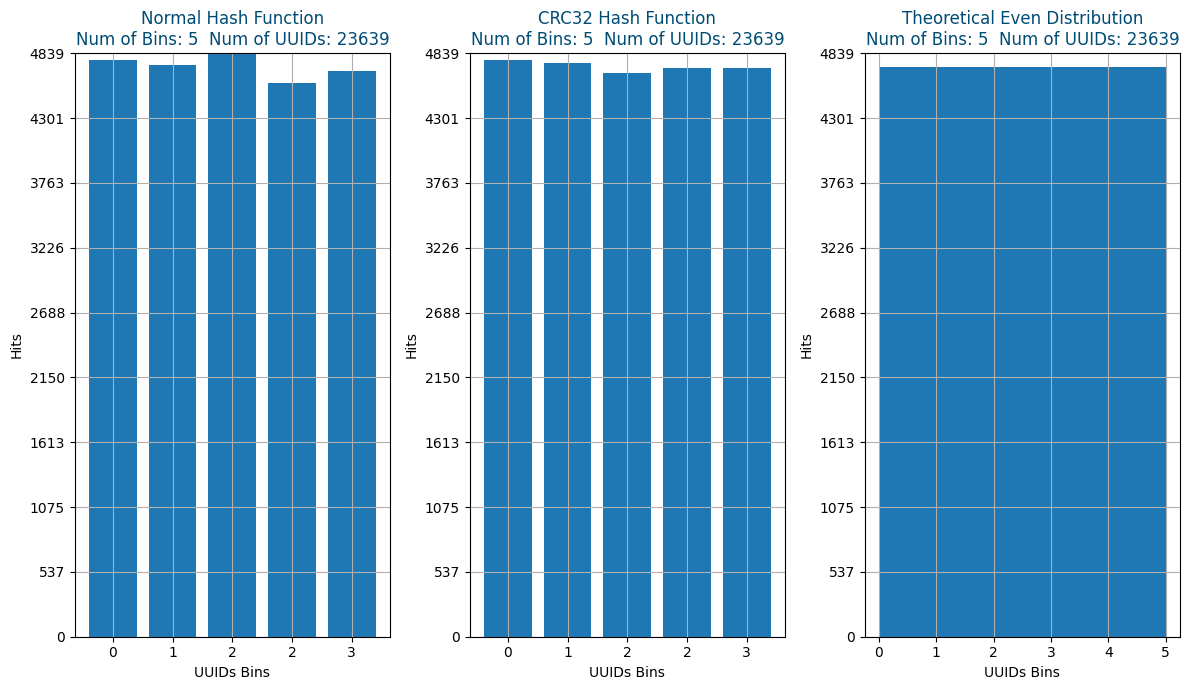

Test case #12 - Num of Bins: 10  Num of UUIDs: 23639


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


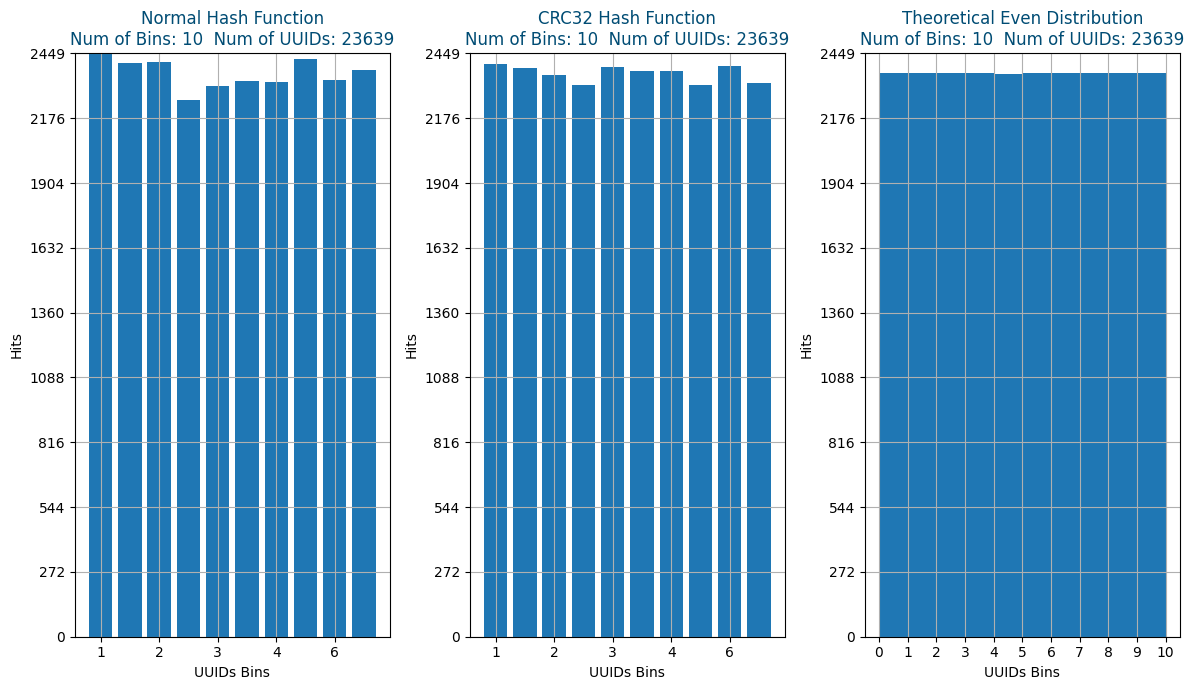

Test case #13 - Num of Bins: 50  Num of UUIDs: 23639


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


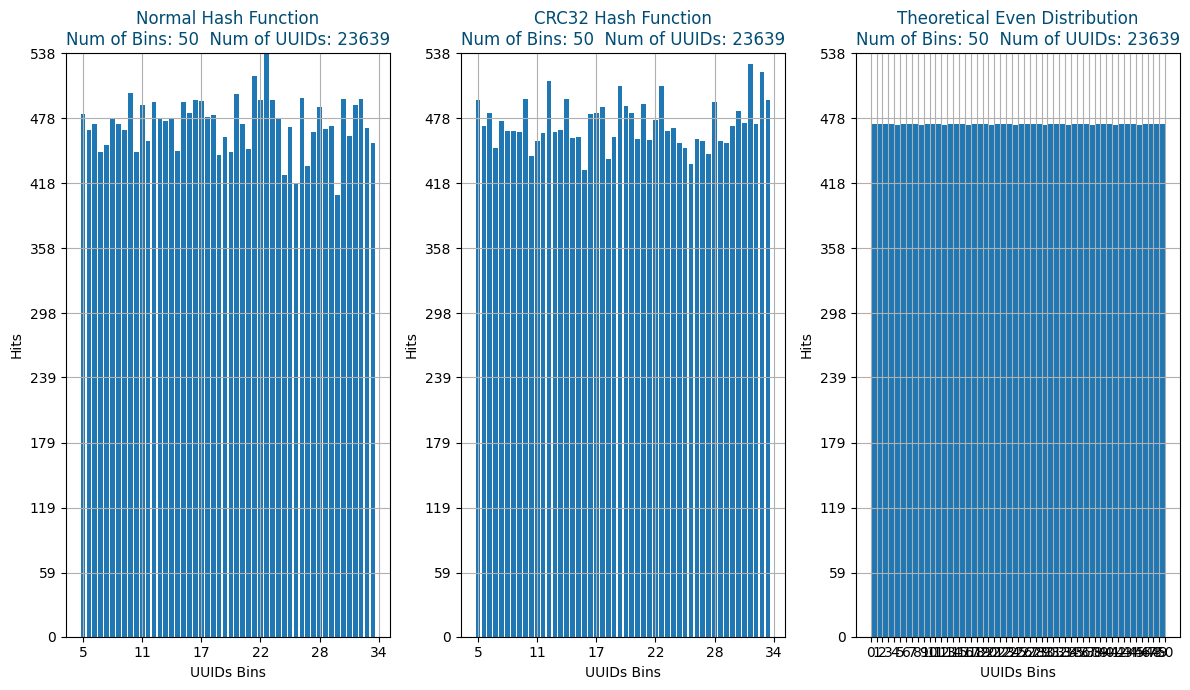

Test case #14 - Num of Bins: 100  Num of UUIDs: 23639


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


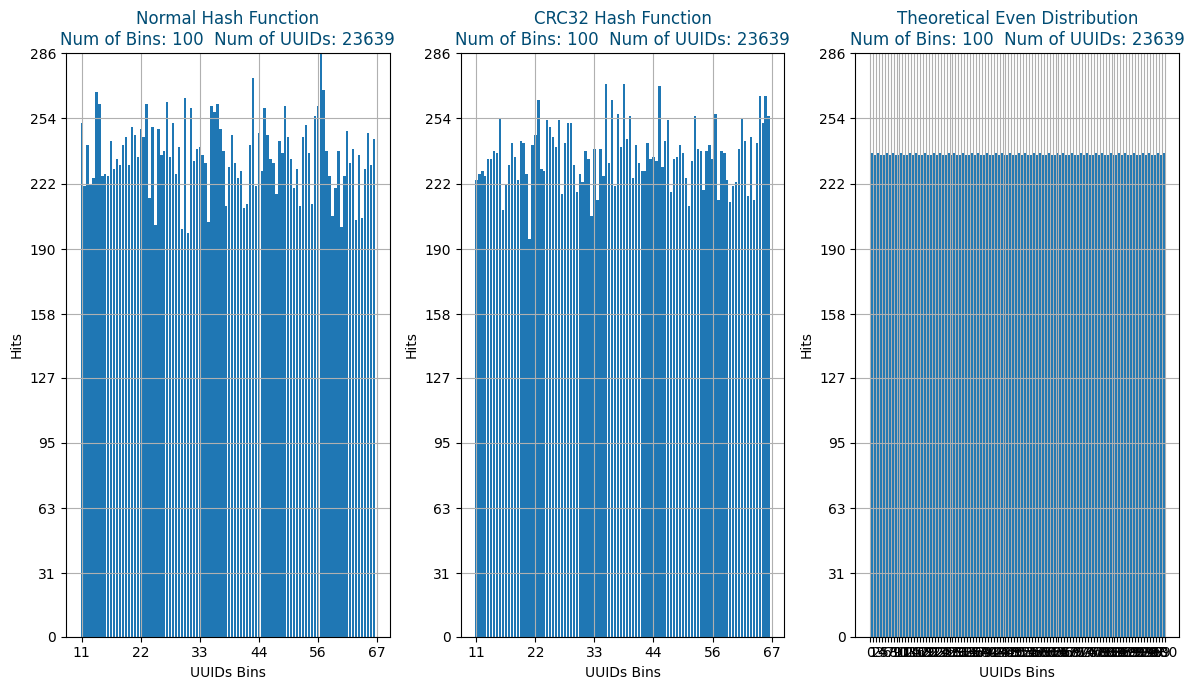

Test case #15 - Num of Bins: 850  Num of UUIDs: 23639


/var/folders/5g/1p6xksn118s2j5m88k45syjh0000gp/T/ipykernel_41764/3123255694.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))


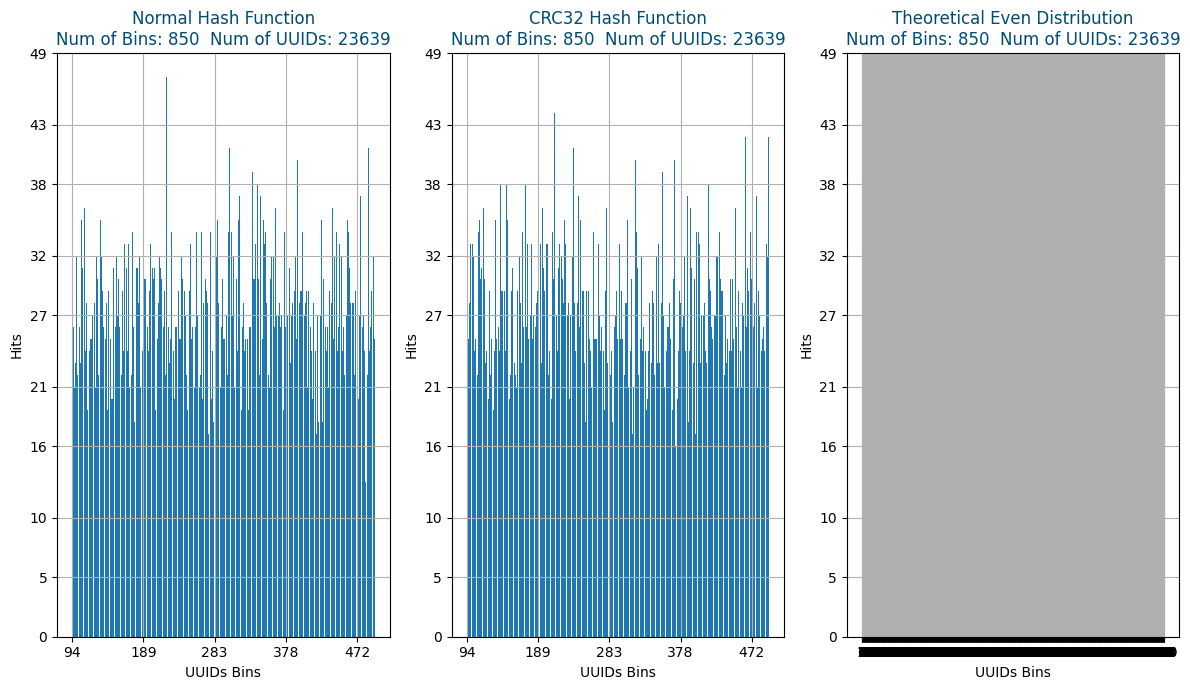

In [433]:
# Test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(100)],   # 100 users
[str(uuid.uuid4().int) for i in range(10000)], # 10k users (client estimation)
[str(uuid.uuid4().int) for i in range(23639)]  # 24k users (our estimation)
]

# Up to 10% of MAUs as bins
num_bins = [5, 10, 50, 100, 850]

print("Python hash function results for random UUIDs")
counter = 0
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        counter+=1
        title = f"Num of Bins: {bin_size}  Num of UUIDs: {len(val)}"
        print(f"Test case #{counter} - {title}")

        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))
        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), tight_layout=True)

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values())

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values())

        # Histogram even distribution
        uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_val = [(i.hex) for i in uuids]  # Convert to hexadecimal
        density, bins, _ = axs[2].hist(hex_val, bins=bin_size)

        # Get max values from Collections
        def f_max(s): return max((c := (s)), key=c.get)
        normal_hash_max = normal_hash_counts[f_max(normal_hash_counts)]
        crc32_hash_max = crc32_hash_counts[f_max(crc32_hash_counts)]
        c_max = max(density)  # Normal max for array
        
        # Get global_max
        global_max = max([normal_hash_max, crc32_hash_max, c_max])

        # Change ax for all
        for ax in axs:
            #ax.grid(axis='y', color=facecolor, lw = 0.9, alpha=0.7)
            #ax.grid(axis='x', color=facecolor, lw = 0.9)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, global_max])
            ax.set_yticks(np.linspace(0, global_max, num=10, dtype=int))
            ax.set_xticklabels(np.linspace(0, len(bins), num=10, dtype=int))

        # Change ax for chart 1
        ax = axs[0]
        ax.set_title(f"Normal Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")

        # Change ax for chart 2
        ax = axs[1]
        ax.set_title(f"CRC32 Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")

        # Change ax for chart 3
        ax = axs[2]
        ax.set_title(f"Theoretical Even Distribution\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        #ax.tick_params(axis='x', which='both', rotation=55)
        ax.set_xticks(bins)
        ax.set_xticklabels(np.arange(len(bins)))
        plt.show()


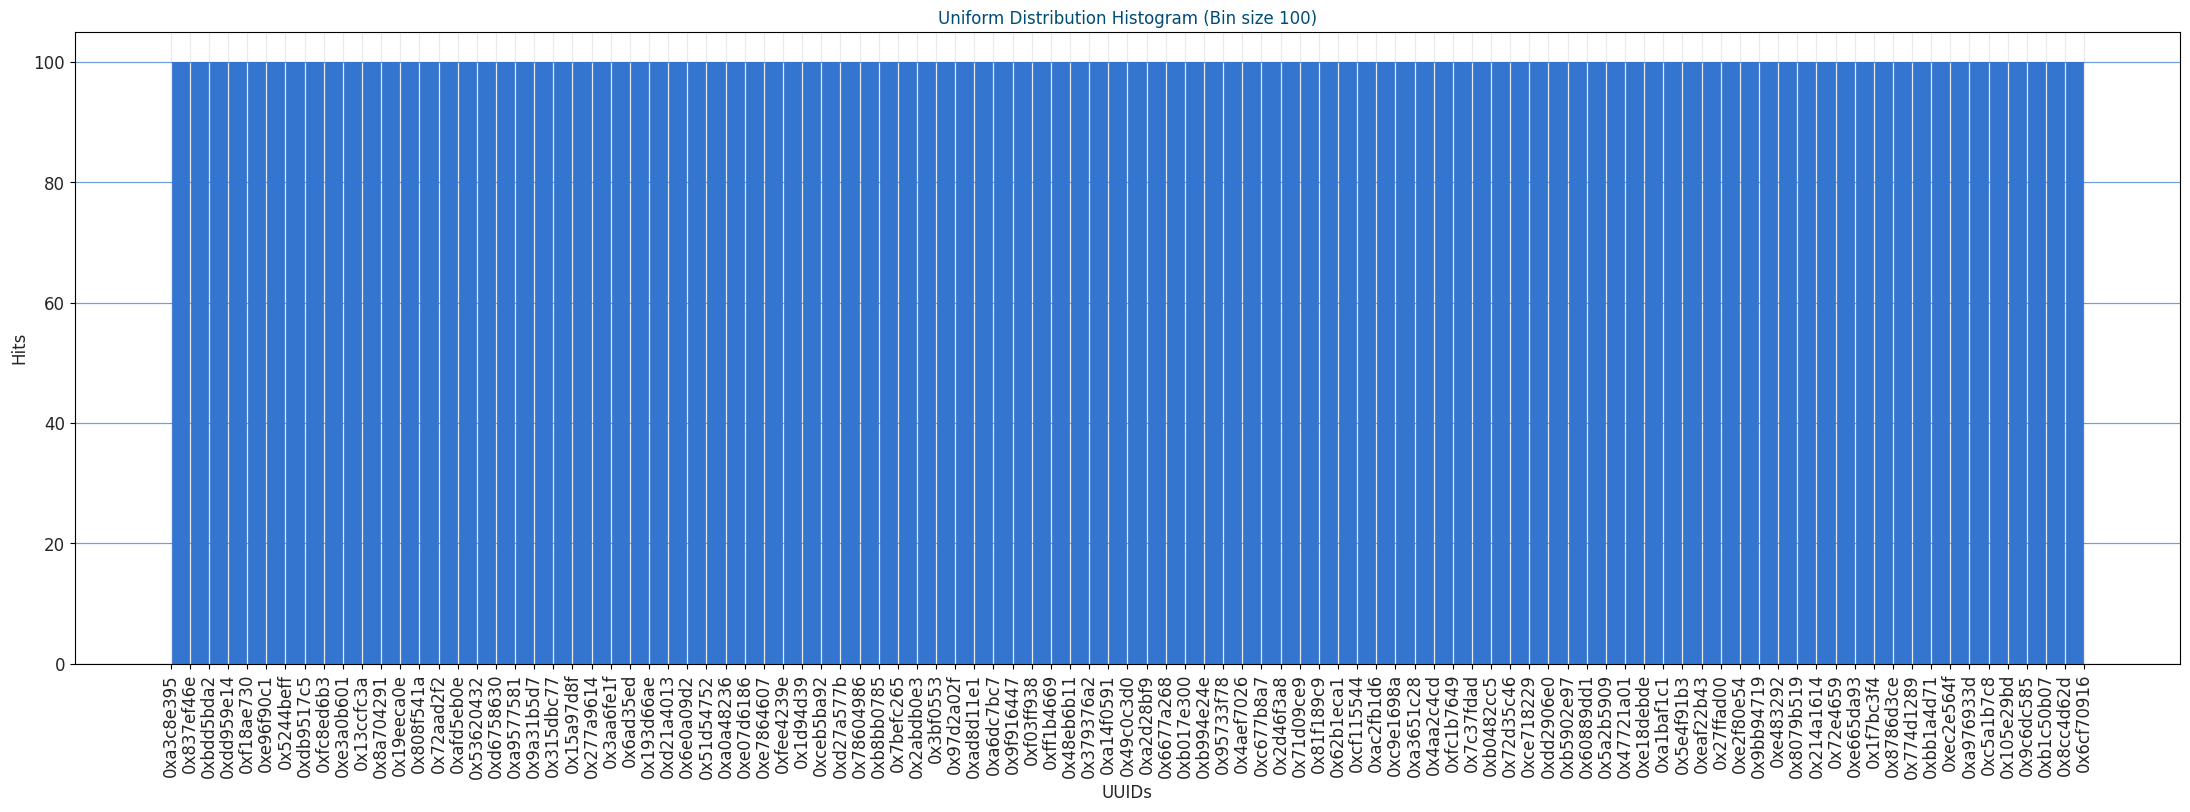

In [84]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# How many UUID's are we going to allow the user
# to connect to at the same time.
allowed_uuids = 100  # binsize

# plot it
fig = plt.figure(figsize=(22,8))
n, bins, patches = plt.hist(client_hash, bins=allowed_uuids, color=color_bars)

plt.xlabel('UUIDs', fontsize=12, c=txt_color1)
plt.ylabel('Hits', fontsize=12, c=txt_color1)
#plt.axis([0, 1, 0, 1000])
#plt.grid(True)

plt.xticks(bins, c=txt_color1, fontsize=12, rotation='vertical')
plt.yticks(c=txt_color1, fontsize=12)
plt.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
plt.grid(axis='x', color=facecolor, lw = 0.9)

#remove major and minor ticks from the x axis, but keep the labels
#ax.tick_params(axis='both', which='both',length=0)
# Hide the right and top spines
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_position(('outward', 10))

#plt.axis([0, 1, 0, 1000])
plt.tight_layout()
plt.title(f"Uniform Distribution Histogram (Bin size {allowed_uuids})", c=txt_color2)
plt.show(block = False)
#plt.savefig('hist.png', facecolor=facecolor)

In [ ]:
# Hashing UUIDs
import zlib

# Create Hash Function
def hash_function(user_id):
    encoded = bytes(user_id, encoding='ascii')
    return hex(zlib.crc32(encoded) & 0xffffffff)

# Test the function
user_id = "GUEST"
uuid_hash = hash_function(user_id)
test_hash = hex(zlib.crc32(b'GUEST') & 0xffffffff)
assert(test_hash == uuid_hash)